<a href="https://colab.research.google.com/github/itsatif/PetimageClassifier/blob/master/PetImageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


importing fastaiLibrary on top of Pytorch1.0

In [0]:
from fastai.vision import*
from fastai.metrics import error_rate

In [0]:
bs = 64
bs = 16

In [5]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_150.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_196.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_21.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_155.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_171.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_5.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_35.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_117.jpg')]

In [0]:
np.random.seed(3)
atif = r'/([^/]+)_\d+.jpg$'

In [12]:
data = ImageDataBunch.from_name_re(path_img, fnames, atif, ds_tfms=get_transforms(), size = 224,bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Sphynx,great_pyrenees,american_pit_bull_terrier,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,samoyed,havanese,wheaten_terrier,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

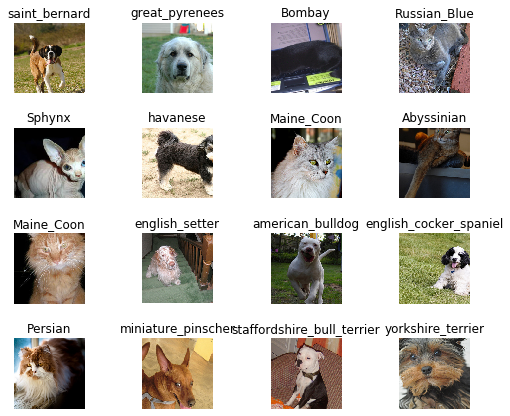

In [13]:
data.show_batch(rows=4, figsize=(7,6))

In [14]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training on **Resnet34**

In [16]:
learn = cnn_learner(data,models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 21.1MB/s]


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.480398,0.300894,0.096752,01:49
1,0.515454,0.352253,0.095399,01:49
2,0.370464,0.253058,0.077131,01:49
3,0.323533,0.236760,0.074425,01:49


# Results

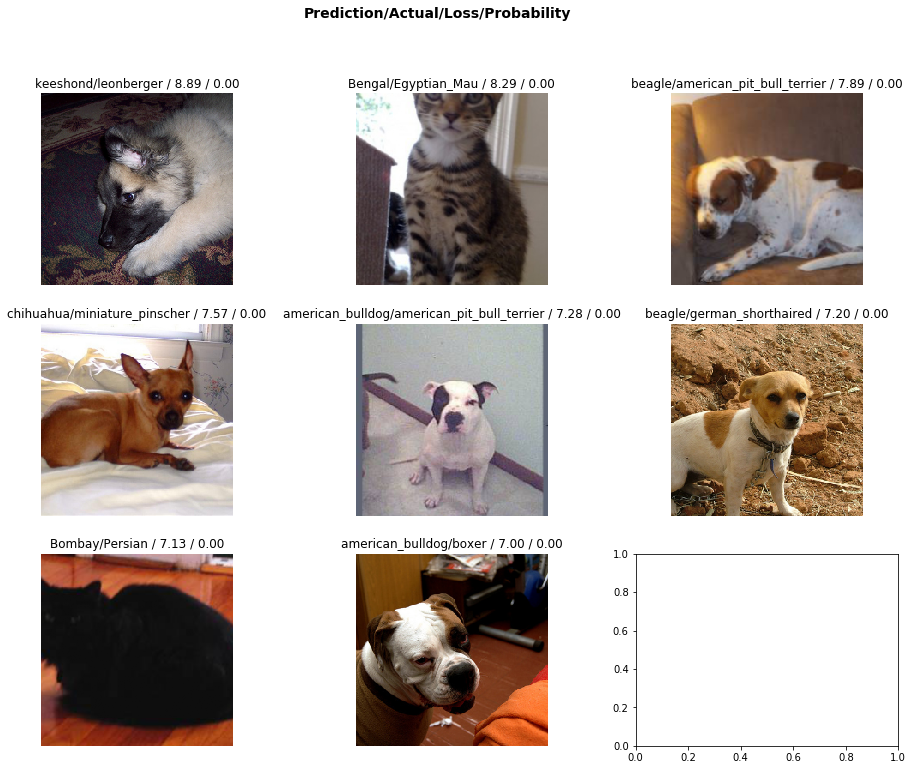

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(8, figsize=(16,12))

In [31]:
doc(interp.plot_top_losses)


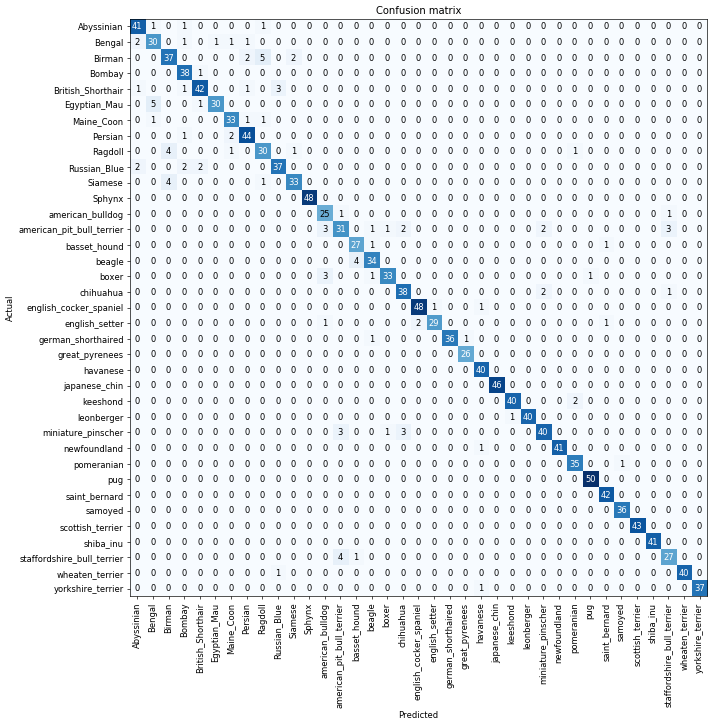

In [37]:
interp.plot_confusion_matrix(figsize =(12,12),dpi=60)

In [38]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 4),
 ('Siamese', 'Birman', 4),
 ('beagle', 'basset_hound', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Persian', 2),
 ('Birman', 'Siamese', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'chihuahua', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('keeshond', 'pomeranian', 2)]

In [0]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.879504,0.391954,0.123816,01:56


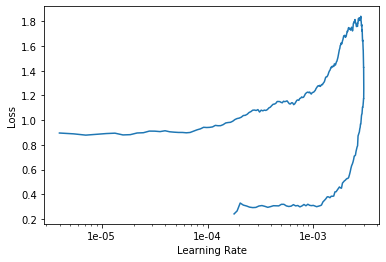

In [41]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [43]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.572638,0.327784,0.101489,01:56
1,0.508693,0.310106,0.098106,01:56


That's a pretty accurate model!


# TRAINING ON **RESNET50**


In [0]:
data =ImageDataBunch.from_name_re(path_img,fnames, atif, ds_tfms=get_transforms(),size=299, bs=bs//2).normalize(imagenet_stats)

In [49]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 46.3MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


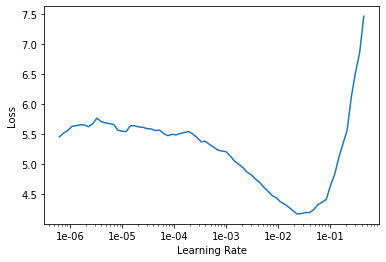

In [50]:
learn.lr_find()
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.991572,0.406243,0.113667,03:44
1,0.849156,0.421741,0.119080,03:38
2,0.793936,0.337172,0.093369,03:38
3,0.570504,0.324310,0.075778,03:39
4,0.433011,0.237514,0.066306,03:40
5,0.384599,0.219272,0.059540,03:39
6,0.316184,0.200482,0.058187,03:40
7,0.285070,0.187951,0.052774,03:38


In [0]:
learn.save('stage-1-50')

In [53]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.277188,0.214636,0.060217,04:55
1,0.230100,0.195695,0.058187,04:51
2,0.214427,0.182127,0.053451,04:52


Going back to previous model


In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [56]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('leonberger', 'keeshond', 2),
 ('saint_bernard', 'boxer', 2),
 ('wheaten_terrier', 'scottish_terrier', 2)]